<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [45]:
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [46]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

boston = pd.concat([X, y], axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [47]:
print(boston.shape)
print(boston.dtypes)
print(boston.isna().sum())
print(boston.describe())
print(boston.nunique())

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000

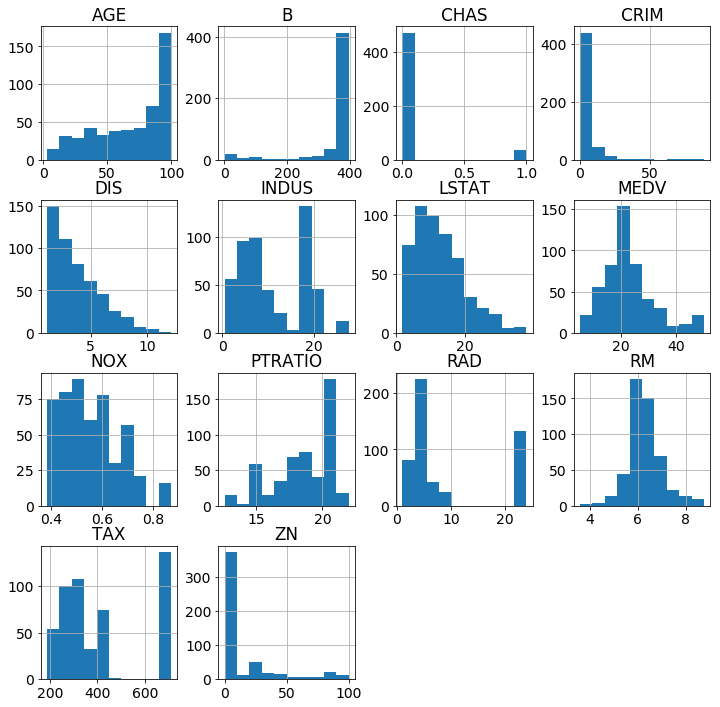

In [48]:
boston.hist(figsize=(12,12));

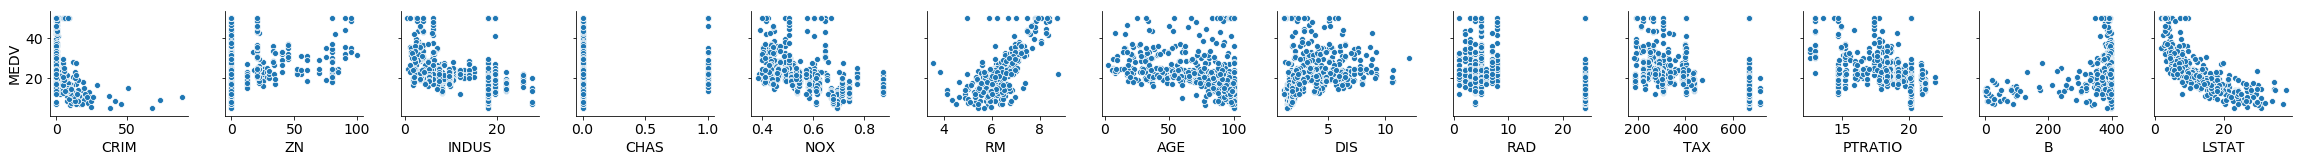

In [49]:
#For this last one we'll do it with seaborn.pairplot to do it faster
import seaborn as sns 

#Now let's do the pairplots with MEDV as the y variable
sns.pairplot(boston, x_vars=[col for col in list(boston.columns.values) if col != 'MEDV'], y_vars='MEDV',);

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [50]:
##Let's first define our target y variable
y = boston.loc[:,'MEDV']

##Now we need to build a null model
#First we get an array of the same shape as our y variable.
null_pred = np.zeros(y.shape)
#Then we put the mean of y in all of the positions of that array
null_pred += np.mean(y)

#Now we need to compare the mean vs the actual values of y, and get the mean squared error
#To do this, we'll import the metrics method from sklearn
from sklearn import metrics
null_mse = metrics.mean_squared_error(y, null_pred)
null_mse

84.41955615616556

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [51]:
##The first thing we have to do is import the train test test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##Let's define our features and our y variables 
#We're going to take all of our columns as our features except for MEDV, which is our y variable.
feature_cols = [col for col in list(boston.columns.values) if col !='MEDV']
X = boston.loc[:,feature_cols]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [57]:
##Let's do train_test_split and specify that we want to train it on 70% of our data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7) #Note: I have no idea why I'm using random_state = 42, it just seems to be fairly common in the documentation

##Now let's fit our model with the train-test split
lr_traintest = LinearRegression()
lr_traintest.fit(X_train,y_train)

#Let's get y_pred
y_pred_test = lr_traintest.predict(X_test)

##Now let's get the mse
mse_train = metrics.mean_squared_error(y_train, lr_traintest.predict(X_train))
mse_test = metrics.mean_squared_error(y_test, y_pred_test)

print('Train MSE:',mse_train)
print('Test MSE:',mse_test)

Train MSE: 16.545792588964947
Test MSE: 37.26976271185425


/Users/sebastianjimenez/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [54]:
#We're going to need Kfolds and cross_val_score from model_selection, so let's import them
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#Let's get an instance of the KFold class and tell it to do 10 different splits of the data
kf = model_selection.KFold(n_splits=10, shuffle=True)
y_pred = lr_traintest.predict(X)

#Since the question is asking us to evaluate
print('Train MSE:',metrics.mean_squared_error(y,y_pred))
print('Test MSE:',np.mean(-cross_val_score(lr_traintest, X, y, cv=kf, scoring='neg_mean_squared_error')))

Train MSE: 22.149603678891726
Test MSE: 23.47069941308986


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

My model performed way better than the null model. It tells me that it has lower bias than my null model.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

My model performed a little better on my training set than it did on my test said, and that means that my model has a little bit of high variance, in the sense that it's overfitting a little bit in the training set. Actually, when now that I removed the random state from my initial train_test_split with no cross validation, I see that the mse of the test data jumps around a ton. It goes from 37 to 22, to 19. So the model deffinitely has high variance. I was super confused in this question because I had kept my random state = 42, and the first time I tested my model in the simple train_test_split, I wasn't really getting a variance problem. My test_set MSE was actually lower than on my training set! So I was incredibly confused with the following questions. 

- How much of a bias problem does your model appear to have? Why do you say that?

The mean squared error in either the train or test dataset not seem to be so high, so my model does not appear to have a lot of bias.

- How much of a variance problem does your model appear to have? Why do you say that?

The variance problem might be there, but the mean squared error of the test data is only 2 units higher than mean squared error of the training data. So there is some sort of variance, but not that much. 

Note: There is deffinitely a lot of variance when I checked my simple train_test_split. On average there doesn't seem to be much variance with the k-fold cross validation, but the mse for the test data does jump around a lot depending on the sample. 

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [11]:
##This is for the question asking me to drop variables from my model.
feature_cols_crap = [col for col in list(boston.columns.values) if col not in ['MEDV','PTRATIO','B']]
X_crap = boston.loc[:,feature_cols_crap]
X_crap.head()

print('Test MSE:',np.mean(-cross_val_score(lr_traintest, X_crap, y, cv=kf, scoring='neg_mean_squared_error')))

Test MSE: 26.868324006183496


I removed variables to address the problem of potential overfitting that could have been suggested by the high variance indicated by the higher mean squared error in the test dataset than in the train dataset, but removing variables only made matters much worse. The MSE for my model now hovers around 26 for test data.

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

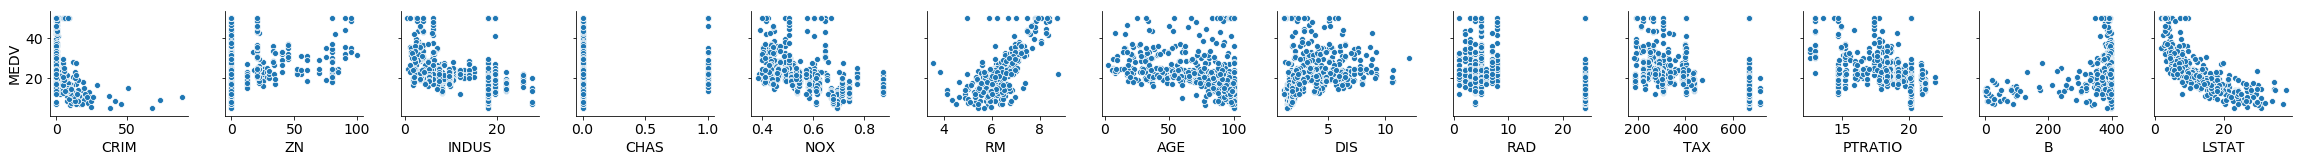

In [59]:
##First let's look at all the scatter plots of all the variables that I displayed a couple of cells ago
sns.pairplot(boston, x_vars=[col for col in list(boston.columns.values) if col != 'MEDV'], y_vars='MEDV',);

In [199]:
## We can do some fun stuff with CRIM, ZN, DIS, B, and LSTAT, so let's do em all.

## ZN, DIS and B all seem to show a squared relationship with MEDV. 
# With ZN and DIS, MEDV is increasing at a decreasing rate, and it actually starts curving downard at a point.
# With B, MEDV is increasing at an increasing rate. 
# The reason I'm picking the square polynomial and not the -1 or -2 polynomial is that it seems as though these variables show a downward trend after a point, which is perfectly modelled by a parabola.
#so let's get the squares! 
boston.loc[:,'ZN_Squared']= boston.loc[:,'ZN']**2
boston.loc[:,'DIS_Squared']= boston.loc[:,'DIS']**2
boston.loc[:,'B_Squared']= boston.loc[:,'B']**2
boston.head()

#Let's do it to the power of -1 and see if we get a better result
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,ZN_Squared,DIS_Squared,B_Squared,CRIM^-1,LSTAT^-2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,324.0,16.728100,157529.6100,158.227848,158.227848
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.0,24.672082,157529.6100,36.616624,36.616624
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.0,24.672082,154315.4089,36.643459,36.643459
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.0,36.750269,155732.8369,30.892802,30.892802
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.0,36.750269,157529.6100,14.482259,14.482259


In [188]:
## CRIM and LSTAT show similar relationships with MEDV, but I think they're the opposite of a square relationship. They're actually decreasing at a decreasing rate.
boston.loc[:,'CRIM^-1']= boston.loc[:,'CRIM']**(-1)
boston.loc[:,'LSTAT^-2']= boston.loc[:,'CRIM']**(-1)

In [195]:
##Now let's get our new feature cols.
feature_cols_awesome = [col for col in list(boston.columns.values) if col not in ['MEDV','LSTAT^-2','CRIM^-1']]
X_awesome = boston.loc[:,feature_cols_awesome]
## Let's add the interaction variable between CRIM and DIS
X_awesome.loc[:,'CRIM-DIS_INT'] = X_awesome.loc[:,'CRIM']*X_awesome.loc[:,'DIS']
X_awesome.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ZN_Squared,DIS_Squared,B_Squared,CRIM-DIS_INT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,324.0,16.728100,157529.6100,0.025849
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.0,24.672082,157529.6100,0.135652
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.0,24.672082,154315.4089,0.135552
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.0,36.750269,155732.8369,0.196233
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.0,36.750269,157529.6100,0.418595


In [197]:
##Now let's model
lr_awesome = LinearRegression()
lr_awesome.fit(X_awesome, y)

#We already defined an instance of the Kfold class, and we're going to do it with the same splits
#so we just need our y_pred
kf = model_selection.KFold(n_splits=10, shuffle=True)
y_pred_awesome = lr_awesome.predict(X_awesome)

#Since the question is asking us to evaluate
print('Train MSE:',metrics.mean_squared_error(y,y_pred_awesome))
print('Test MSE:',np.mean(-cross_val_score(lr_awesome, X_awesome, y, cv=kf, scoring='neg_mean_squared_error')))

Train MSE: 20.310456096086142
Test MSE: 21.959623546489098


In [194]:
##So the MSE went down a little bit. Went down one or two points. Not bad. I still think this could be done better.

# KNN Practice

In [200]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [201]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [202]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [203]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [241]:
iris.loc[:,'species_num'] = iris.loc[:,'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [242]:
print(iris.shape)
print(iris.dtypes)
print(iris.isna().sum())
print(iris.describe())

(150, 6)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64
       sepal_length  sepal_width  petal_length  petal_width  species_num
count    150.000000   150.000000    150.000000   150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667     1.000000
std        0.828066     0.433594      1.764420     0.763161     0.819232
min        4.300000     2.000000      1.000000     0.100000     0.000000
25%        5.100000     2.800000      1.600000     0.300000     0.000000
50%        5.800000     3.000000      4.350000     1.300000     1.000000
75%        6.400000     3.300000      5.100000     1.800000     2.000000
max        7.900000     4.400000      6.900000     2.500000     2.000000


In [243]:
##Let's print the number of unique values in every column. 
##I don't want to have to write out all the column names, so let's just make a for loop that does it in one go. 

for col in list(iris.columns.values): #I made a list of all the column names and I'm going to be going through every element in that list.
    print(col+":",len(iris.loc[:,col].unique())) #I'm printing the name of the column and the lenght of it's list of unique values.

sepal_length: 35
sepal_width: 23
petal_length: 43
petal_width: 22
species: 3
species_num: 3


species
Iris-setosa        [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Iris-versicolor    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Iris-virginica     [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

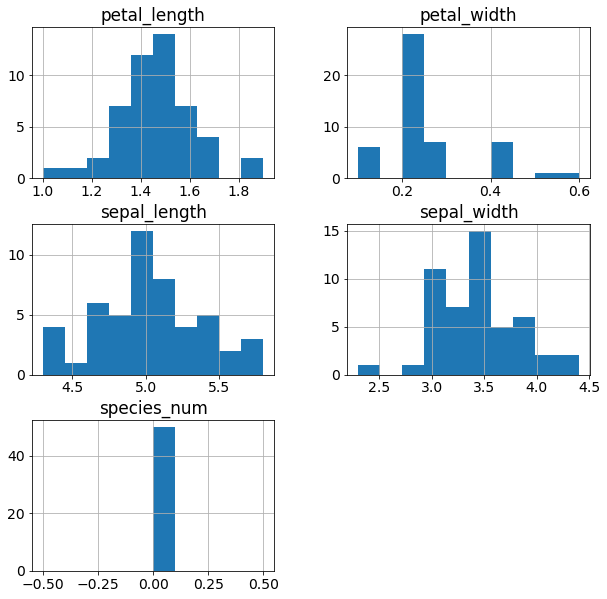

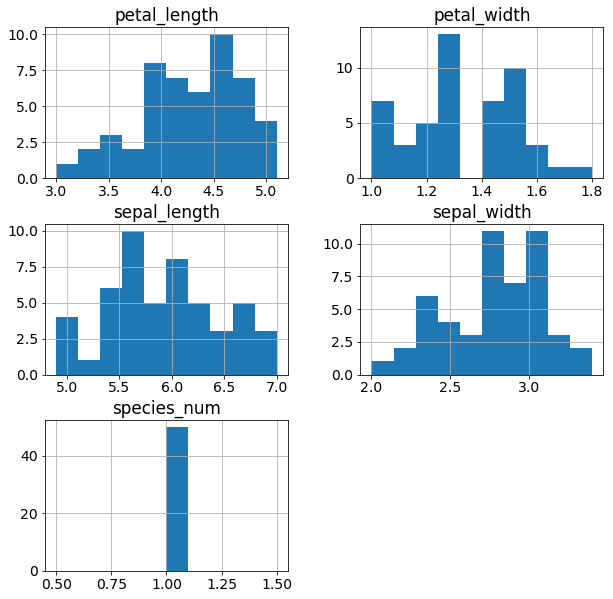

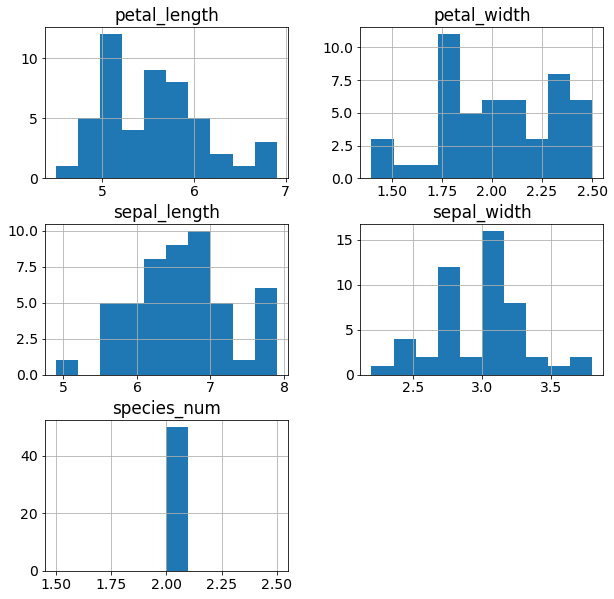

In [244]:
iris.groupby('species').hist(figsize=(10,10))

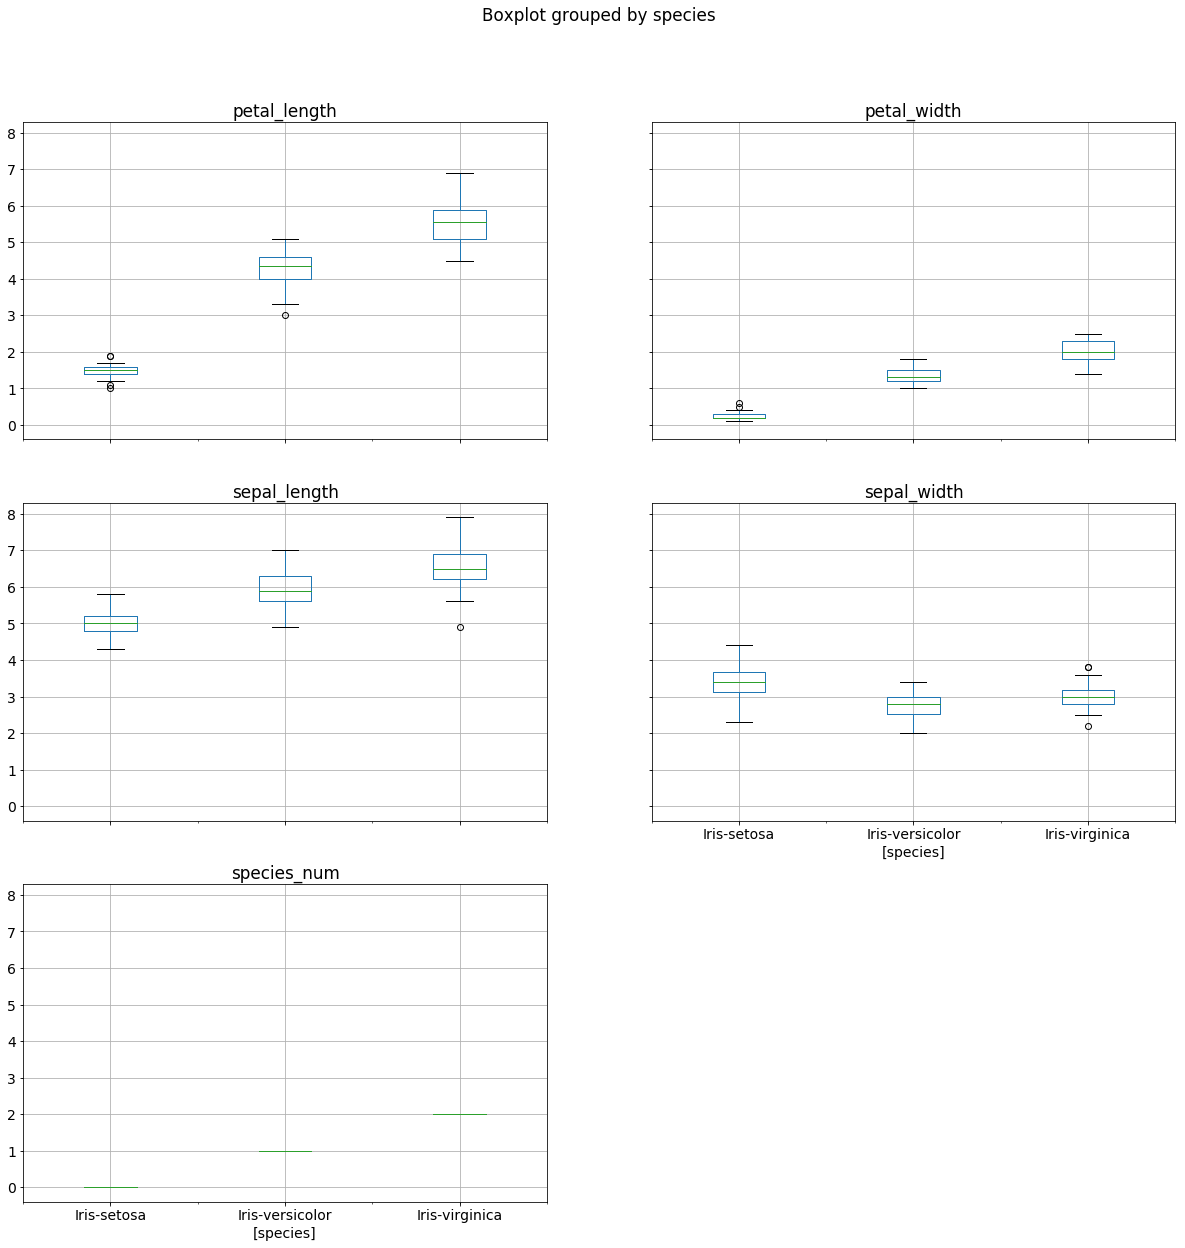

In [246]:
iris.boxplot(by='species', figsize=(20,20));

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [248]:
##We need to import KNearestNeighbors from sklearn
from sklearn.neighbors import KNeighborsClassifier

##Let's define my X and y now
feature_cols_KNN = [col for col in list(iris.columns.values) if col not in ['species_num','species']]
X = iris.loc[:,feature_cols_KNN]
y = iris.loc[:,'species_num']

In [254]:
##Now let's get our train_test_split model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)

##Now Let's train the train data with the KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
##Now let's predict
y_pred_knn = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_knn)

0.9210526315789473

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

In [255]:
most_common_value = y.value_counts().idxmax()
null_pred = np.zeros(y.shape) + most_common_value
null_accuracy = metrics.accuracy_score(null_pred, y)
null_accuracy

0.3333333333333333

My model performed way, way better than the null model. It had 92% accuracy whereas the null had 33% accuracy.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

In [258]:
y_pred_knn_train = knn.predict(X_train)
metrics.accuracy_score(y_train, y_pred_knn_train)

1.0

The accuracy on my training dataset is 100%. Which is weird. But I checked in many ways and it does seem to be the case that it's right all the time.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

A variance problem, because the accuracy is pretty good in both train and test sets but the test set accuracy is 8 percentage points below the training set, so that's a problem.

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [259]:
##Now Let's train the train data with the KNN model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
##Now let's predict
y_pred_knn = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_knn)

0.9736842105263158

My model got much, much better. By 5% points in accuracy in my test set

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [265]:
for k in range(10,101):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    print('Accuracy for k=',k,np.mean(cross_val_score(knn, X, y, cv=kf, scoring='accuracy')))

Accuracy for k= 10 0.96
Accuracy for k= 11 0.96
Accuracy for k= 12 0.9733333333333334
Accuracy for k= 13 0.9600000000000002
Accuracy for k= 14 0.9800000000000001
Accuracy for k= 15 0.9800000000000001
Accuracy for k= 16 0.9666666666666668
Accuracy for k= 17 0.9666666666666668
Accuracy for k= 18 0.9800000000000001
Accuracy for k= 19 0.9733333333333334
Accuracy for k= 20 0.96
Accuracy for k= 21 0.9466666666666667
Accuracy for k= 22 0.96
Accuracy for k= 23 0.9533333333333334
Accuracy for k= 24 0.96
Accuracy for k= 25 0.9666666666666668
Accuracy for k= 26 0.9533333333333334
Accuracy for k= 27 0.9466666666666667
Accuracy for k= 28 0.9466666666666667
Accuracy for k= 29 0.9400000000000001
Accuracy for k= 30 0.9533333333333334
Accuracy for k= 31 0.96
Accuracy for k= 32 0.9466666666666667
Accuracy for k= 33 0.9400000000000001
Accuracy for k= 34 0.9333333333333333
Accuracy for k= 35 0.9533333333333334
Accuracy for k= 36 0.9400000000000001
Accuracy for k= 37 0.9533333333333334
Accuracy for k= 38 0

We see that the accuracy sort of plateaus at around k = [15,20], and it gets pretty bad as we near the k = 100 values.

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [40]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

AttributeError: 'DataFrame' object has no attribute 'data'

In [8]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 20 May 2018   Prob (F-statistic):          1.59e-321
Time:                        10:10:40   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [41]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

NameError: name 'df' is not defined

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
